In [1]:
import os
import glob
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False

### 先检查总数是否对应

In [2]:
train_files = []
for root, dirs, names in os.walk('E:/Zip&Data/dataset/rscup/train'):
    for name in names:
        train_files.append(os.path.join(root,name))
len(train_files)

177409

In [3]:
val_files = []
for root, dirs, names in os.walk('E:/Zip&Data/dataset/rscup/val'):
    for name in names:
        val_files.append(os.path.join(root,name))
len(val_files)

19712

In [4]:
test_files = []
for root, dirs, names in os.walk('E:/Zip&Data/dataset/rscup/test'):
    for name in names:
        test_files.append(os.path.join(root,name))
len(test_files)

89233

### 检查样本平衡

In [5]:
train_files[0]

'E:/Zip&Data/dataset/rscup/train\\停机坪\\apron_00001.jpg'

In [6]:
train_statistic = Counter()
for name in train_files:
    catogory = name.split('\\')[-2]
    train_statistic[catogory]+=1
train_statistic  

Counter({'停机坪': 2824,
         '停车场': 2865,
         '公园': 5277,
         '公路': 5504,
         '冰岛': 2537,
         '商业区': 7164,
         '墓地': 10236,
         '太阳能发电厂': 1545,
         '居民区': 6086,
         '山地': 3653,
         '岛屿': 2543,
         '工厂': 5649,
         '教堂': 6044,
         '旱地': 7214,
         '机场跑道': 1288,
         '林地': 1471,
         '桥梁': 6133,
         '梯田': 11801,
         '棒球场': 1149,
         '水田': 4611,
         '沙漠': 4962,
         '河流': 8646,
         '油田': 1143,
         '油罐区': 1284,
         '海滩': 1228,
         '温室': 3287,
         '港口': 2117,
         '游泳池': 1427,
         '湖泊': 1890,
         '火车站': 3164,
         '直升机场': 1647,
         '石质地': 7891,
         '矿区': 2330,
         '稀疏灌木地': 3637,
         '立交桥': 1735,
         '篮球场': 8221,
         '网球场': 7888,
         '草地': 1803,
         '裸地': 2916,
         '足球场': 1251,
         '路边停车区': 1109,
         '转盘': 5141,
         '铁路': 3096,
         '风力发电站': 1811,
         '高尔夫球场': 2191})

In [7]:
train_names = list(train_statistic.keys())
train_nums = list(train_statistic.values())
print(train_names)
print(train_nums)

['停机坪', '停车场', '公园', '公路', '冰岛', '商业区', '墓地', '太阳能发电厂', '居民区', '山地', '岛屿', '工厂', '教堂', '旱地', '机场跑道', '林地', '桥梁', '梯田', '棒球场', '水田', '沙漠', '河流', '油田', '油罐区', '海滩', '温室', '港口', '游泳池', '湖泊', '火车站', '直升机场', '石质地', '矿区', '稀疏灌木地', '立交桥', '篮球场', '网球场', '草地', '裸地', '足球场', '路边停车区', '转盘', '铁路', '风力发电站', '高尔夫球场']
[2824, 2865, 5277, 5504, 2537, 7164, 10236, 1545, 6086, 3653, 2543, 5649, 6044, 7214, 1288, 1471, 6133, 11801, 1149, 4611, 4962, 8646, 1143, 1284, 1228, 3287, 2117, 1427, 1890, 3164, 1647, 7891, 2330, 3637, 1735, 8221, 7888, 1803, 2916, 1251, 1109, 5141, 3096, 1811, 2191]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 <a list of 45 Text xticklabel objects>)

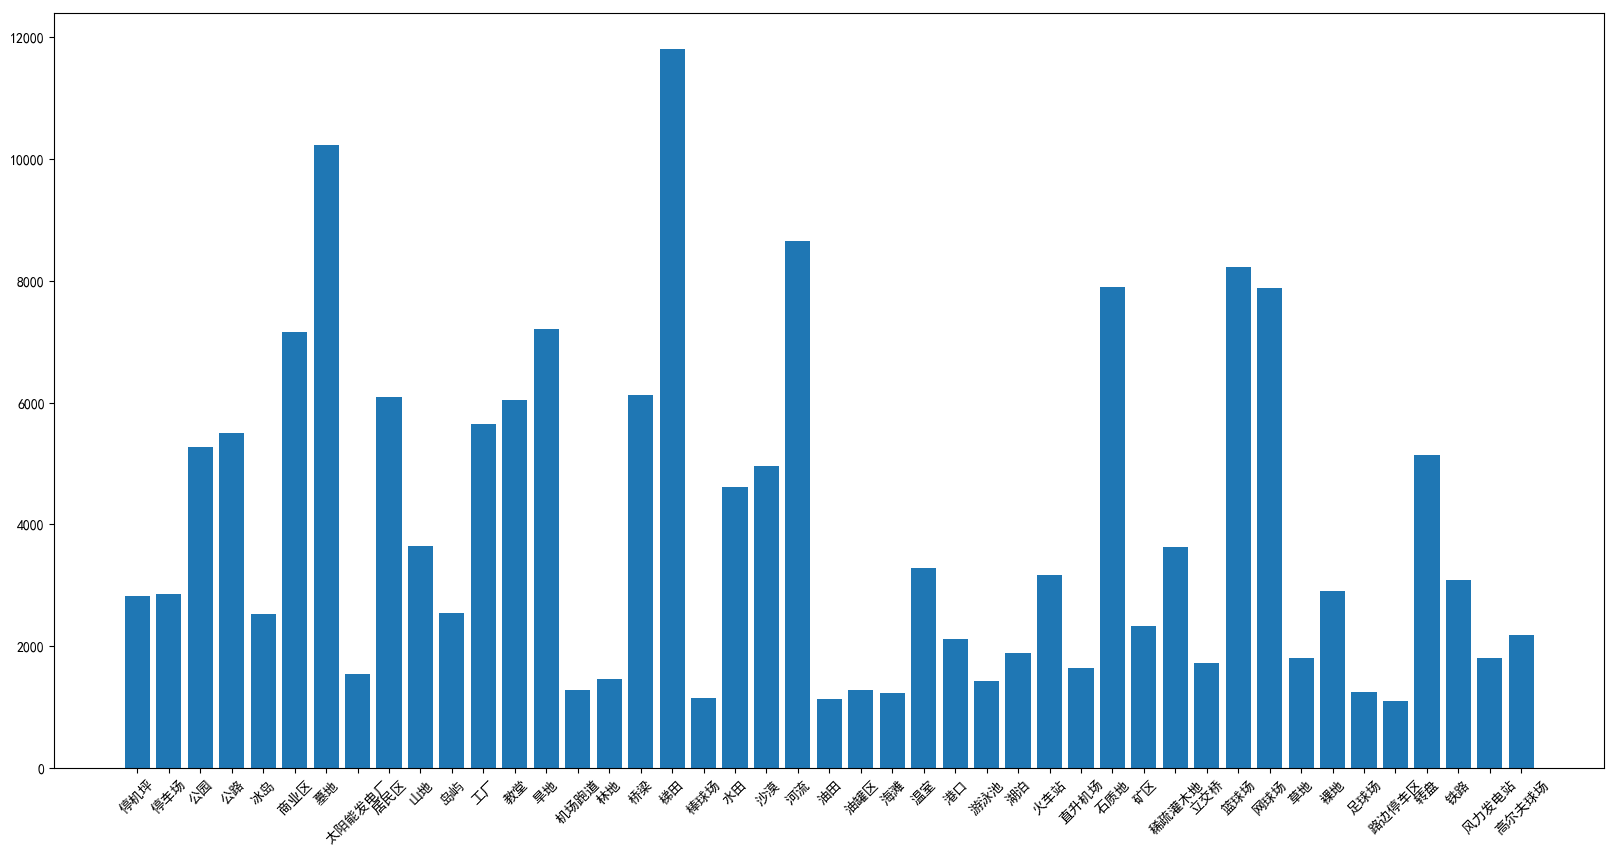

In [8]:
plt.figure(figsize=(20,10),dpi=100)
plt.bar(train_names,train_nums)
plt.xticks(rotation=45)

数据平衡可以在dataloader里实现，通过data __len__的方式确定一个迭代出几次数据，

通过随机选择每个分类的数据

In [9]:
val_statistic = Counter()
for name in val_files:
    catogory = name.split('\\')[-2]
    val_statistic[catogory]+=1
val_names = list(val_statistic.keys())
val_nums = list(val_statistic.values())

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 <a list of 45 Text xticklabel objects>)

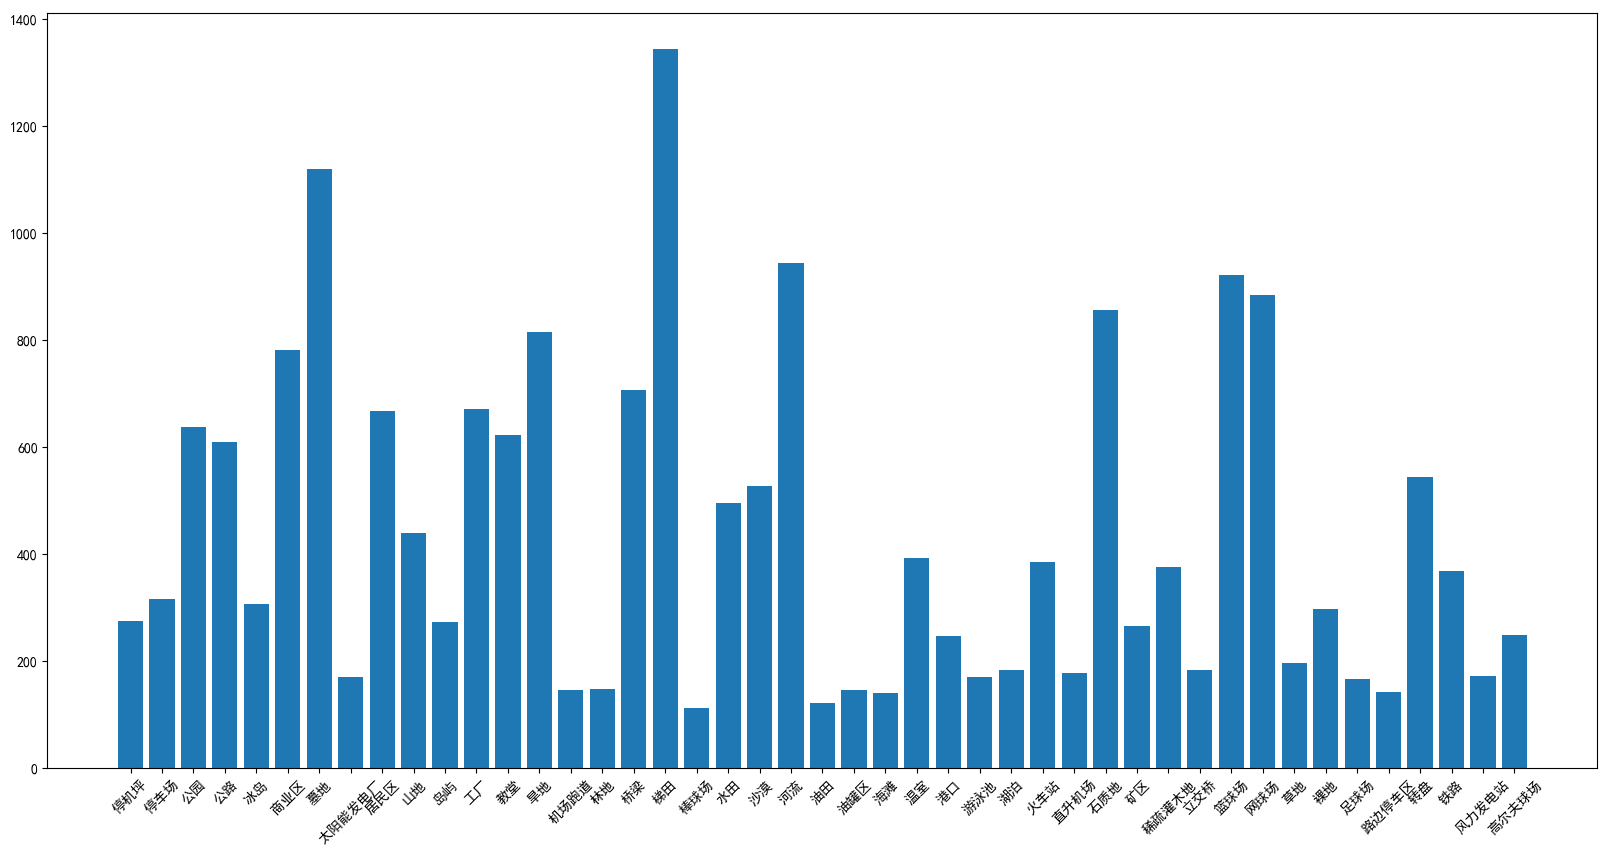

In [10]:
plt.figure(figsize=(20,10),dpi=100)
plt.bar(val_names,val_nums)
plt.xticks(rotation=45)

## 检查分布是否相同

In [11]:
# 检查列表是否相等
train_names==val_names

True

In [12]:
data = pd.DataFrame(index=train_names,data=np.array([train_nums,val_nums]).T)
data.columns=['train','val']
data.head()

,train,val
停机坪,2824,275
停车场,2865,316
公园,5277,638
公路,5504,609
冰岛,2537,307


In [13]:
data['proportion'] = data['train']/data['val']
data.head()

,train,val,proportion
停机坪,2824,275,10.269091
停车场,2865,316,9.066456
公园,5277,638,8.271160
公路,5504,609,9.037767
冰岛,2537,307,8.263844


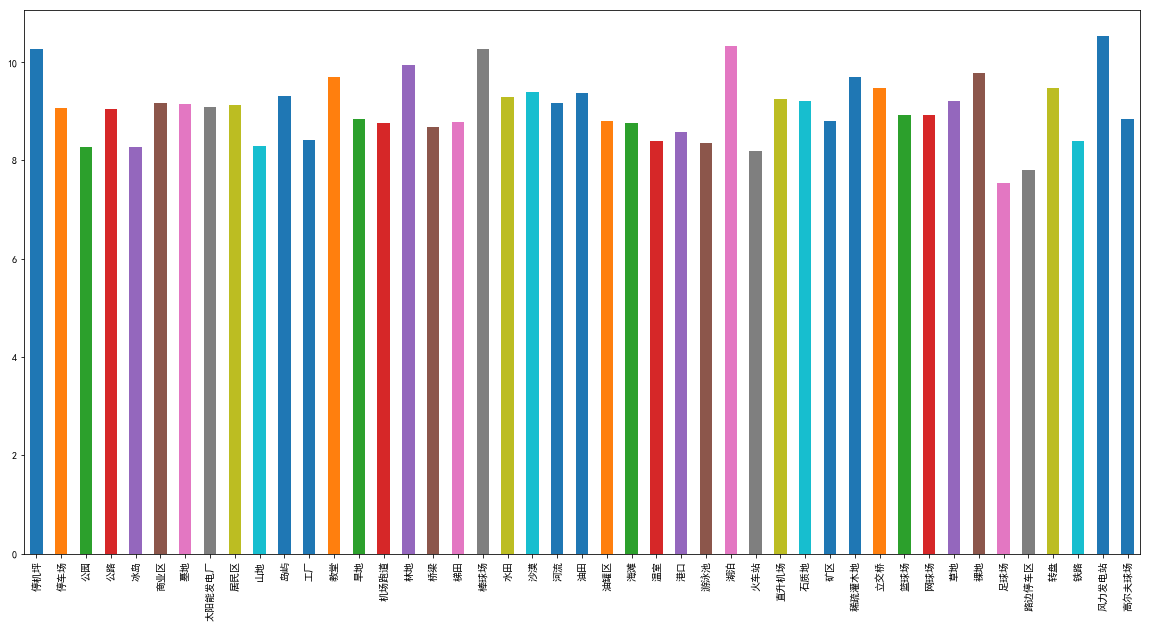

In [14]:
data['proportion'].plot(kind='bar', figsize=(20,10))

# 由此可见，训练、验证集服从同一分布